# Initial Analysis

## Medical Data Understanding

## Libraries Import

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

## Data Import

### Tabular Data

In [3]:
dfGroundTruth = pd.read_csv('ISIC2018_Task3_Training_GroundTruth.csv')
dfLesionGroupings = pd.read_csv('ISIC2018_Task3_Training_LesionGroupings.csv')

In [4]:
dfGroundTruth.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dfLesionGroupings.head()

,image,lesion_id,diagnosis_confirm_type
0,ISIC_0024306,HAM_0000550,serial imaging showing no change
1,ISIC_0024307,HAM_0003577,serial imaging showing no change
2,ISIC_0024308,HAM_0001477,serial imaging showing no change
3,ISIC_0024309,HAM_0000484,serial imaging showing no change
4,ISIC_0024310,HAM_0003350,histopathology


### Image Data

## Dataset Analysis

### Ground Truth Data

In [8]:
dfGroundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   10015 non-null  object 
 1   MEL     10015 non-null  float64
 2   NV      10015 non-null  float64
 3   BCC     10015 non-null  float64
 4   AKIEC   10015 non-null  float64
 5   BKL     10015 non-null  float64
 6   DF      10015 non-null  float64
 7   VASC    10015 non-null  float64
dtypes: float64(7), object(1)
memory usage: 626.1+ KB


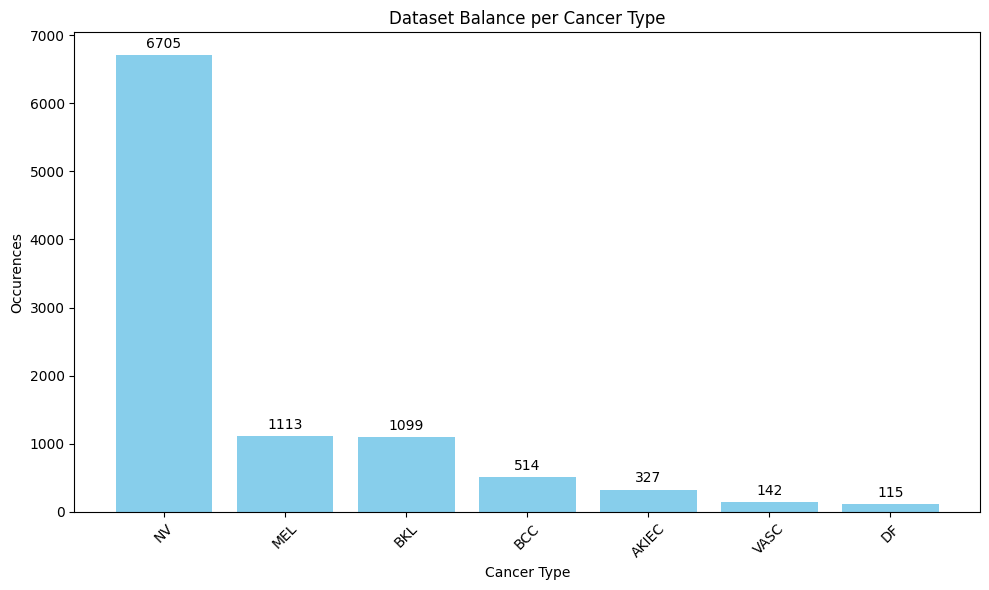

In [28]:
# Definition of cancer type features and values
cancerTypes = ["MEL","NV","BCC","AKIEC","BKL","DF","VASC"]
cancerTypeOccurences = dfGroundTruth[cancerTypes].sum().sort_values(ascending=False)

# Creation of bar plot with data labels and titles
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(cancerTypeOccurences.index, cancerTypeOccurences.values, color='skyblue')
ax.bar_label(bars, padding=3)
ax.set_title('Dataset Balance per Cancer Type')
ax.set_xlabel('Cancer Type')
ax.set_ylabel('Occurences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lesion Groupings Data

In [19]:
dfLesionGroupings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   image                   10015 non-null  object
 1   lesion_id               10015 non-null  object
 2   diagnosis_confirm_type  10015 non-null  object
dtypes: object(3)
memory usage: 234.9+ KB


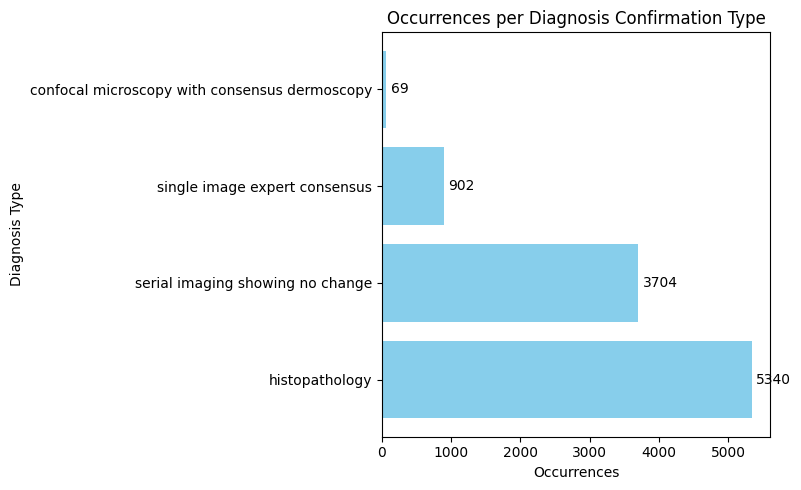

In [29]:
# Definition of diagnosis confirmation type and values
diagnosisTypeCount = dfLesionGroupings['diagnosis_confirm_type'].value_counts()

# Creation of horizontal plot with data values
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(diagnosisTypeCount.index, diagnosisTypeCount.values, color='skyblue')
ax.bar_label(bars, padding=3)
ax.set_ylabel('Diagnosis Type')
ax.set_xlabel('Occurrences')
ax.set_title('Occurrences per Diagnosis Confirmation Type')
plt.tight_layout()
plt.show()

### Combined Ground Truth and Lesion Groupings

In [31]:
# Merging of both datasets to allow combined analysis
dfCombined = pd.merge(dfGroundTruth, dfLesionGroupings, on='image')

In [32]:
dfCombined.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,lesion_id,diagnosis_confirm_type
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HAM_0000550,serial imaging showing no change
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HAM_0003577,serial imaging showing no change
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HAM_0001477,serial imaging showing no change
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HAM_0000484,serial imaging showing no change
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,HAM_0003350,histopathology


In [35]:
# Reverse one-hot encoding from cancer types features, creating a single cancer_type column
dfCombined['cancer_type'] = dfCombined[cancerTypes].idxmax(axis=1)
dfCombined = dfCombined.drop(columns=cancerTypes)

In [36]:
dfCombined.head()

,image,lesion_id,diagnosis_confirm_type,cancer_type
0,ISIC_0024306,HAM_0000550,serial imaging showing no change,NV
1,ISIC_0024307,HAM_0003577,serial imaging showing no change,NV
2,ISIC_0024308,HAM_0001477,serial imaging showing no change,NV
3,ISIC_0024309,HAM_0000484,serial imaging showing no change,NV
4,ISIC_0024310,HAM_0003350,histopathology,MEL


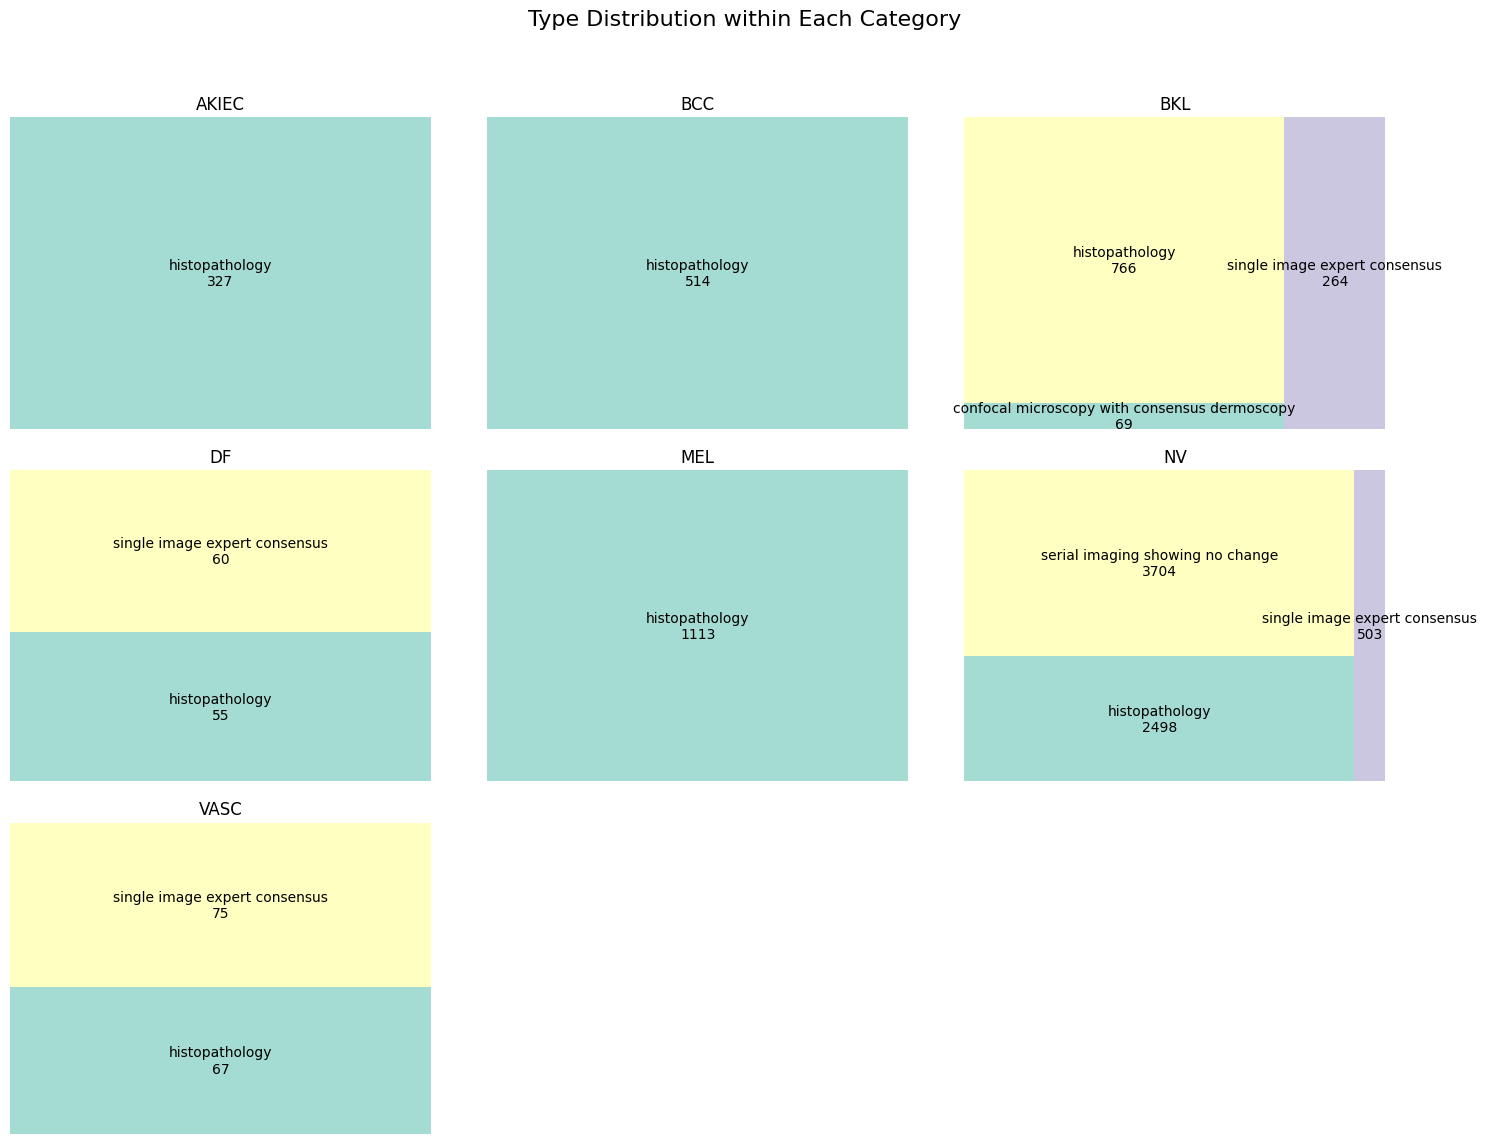

In [55]:
# Group data and extract unique cancer types
dfGrouped = dfCombined.groupby(['cancer_type', 'diagnosis_confirm_type']).size().reset_index(name='count')
cancerTypes = dfGrouped['cancer_type'].unique()

cols = 3 # columns per row
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

# Flatten axes for 1D list and iterate through the cancer types
# Definition of labels to show diagnosis types and size it based on sample size
# Colour pattern and labels definition
axes = axes.flatten()
for i, category in enumerate(cancerTypes):
    ax = axes[i]
    sub_df = grouped[grouped['cancer_type'] == category]
    labels = sub_df.apply(lambda x: f"{x['diagnosis_confirm_type']}\n{x['count']}", axis=1)
    sizes = sub_df['count'].values
    colors = plt.cm.Set3(range(len(sizes)))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, ax=ax)
    ax.set_title(f"{category}", fontsize=12)
    ax.axis('off') # removed axis grid

for j in range(i + 1, len(axes)):
       axes[j].axis('off') # removed unused subplots

plt.suptitle("Type Distribution within Each Category", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()